### Create dataloader from pandas dataframe

#### References

https://pytorch.org/tutorials/beginner/data_loading_tutorial.html (main ref.)

https://stanford.edu/~shervine/blog/pytorch-how-to-generate-data-parallel

https://stackoverflow.com/questions/50544730/how-do-i-split-a-custom-dataset-into-training-and-test-datasets

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import sys
if sys.version_info[0] == 2:
    import cPickle as pickle
else:
    import pickle

# import torchvision.transforms as transforms
import torch
import torch.utils.data as utils
from torch.utils.data import Dataset, DataLoader

import mm_patch.transforms
from mm_patch.data import PatchesDataset
from torchvision import transforms, utils



In [3]:
# with open('./patches.pkl', 'rb') as file:
#     patches_df = pickle.load(file)

762 (56, 56) 1
194 (56, 56) 1
2400 (56, 56) 0
873 (56, 56) 1


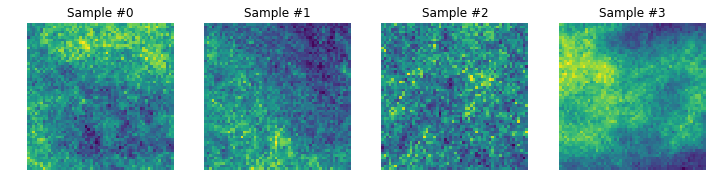

['venous', 'dense']

In [5]:
patches = PatchesDataset(data_path='./patches.pkl')

fig = plt.figure(figsize = (10,10))

# for i in range(len(patches_dataset)):
for i,idx in enumerate(np.random.randint(len(patches),size = 4)):
    sample = patches[idx]
    print(idx, sample['patch'].shape, sample['target'])
    ax = fig.add_subplot(1, 4, i+1)
    ax.imshow(sample['patch'][:,:])
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')

    plt.tight_layout()
plt.show()

patches.unique_labels

In [6]:
patches.data.sample(10)

,patch,label,target
2618,"[[22437, 19556, 19412, 22053, 18100, 17956, 21...",venous,0
915,"[[33096, 29399, 26870, 28070, 31927, 33320, 29...",dense,1
2140,"[[16132, 14035, 15380, 15380, 14739, 14099, 13...",venous,0
1303,"[[31047, 31031, 30871, 29591, 31063, 30375, 29...",dense,1
903,"[[16932, 19797, 19893, 22181, 19941, 24262, 25...",dense,1
637,"[[8786, 8034, 10306, 7474, 8514, 9554, 9954, 1...",dense,1
1579,"[[23237, 23797, 21125, 21637, 19444, 18164, 22...",venous,0
2484,"[[8482, 8514, 9074, 8242, 7954, 8706, 7442, 60...",venous,0
1049,"[[8082, 7298, 7346, 11363, 7618, 8786, 8514, 1...",dense,1
1408,"[[14979, 17092, 15364, 15428, 11667, 16116, 14...",venous,0


In [7]:
composed = transforms.Compose([mm_patch.transforms.ToTensor(),
                               mm_patch.transforms.GrayToRGB()])

transformed_dataset = PatchesDataset(data_path='./patches.pkl', transform = transforms.Compose([mm_patch.transforms.ToTensor(),
                               mm_patch.transforms.GrayToRGB()]))

dataloader = DataLoader(transformed_dataset, batch_size=4, shuffle=True, num_workers=4)

In [ ]:
# Helper function to show a batch
def show_patches_batch(sample_batched, max_images = None):
    """Show patches for a batch of samples."""
    patches_batch, targets_batch = \
            sample_batched['patch'], sample_batched['target']
    num_img = len(patches_batch)
    
    if max_images:
        num_img = max_images
    
    sqrt_num_img = np.ceil(np.sqrt(num_img))
    im_size = patches_batch.size(2)
#     print(im_size)
    grid_border_size = 2

    grid = utils.make_grid(patches_batch)
    
#     plt.imshow(grid.numpy().transpose((1, 2, 0)))
    fig = plt.figure(figsize = (10,10))
    for i in range(num_img):
        ax = fig.add_subplot(sqrt_num_img, sqrt_num_img, i+1)
        ax.imshow(patches_batch[i][0])
        ax.set_title(f'Class: {patches.unique_labels[targets_batch[i]]}')
        ax.axis('off')

        plt.tight_layout()
#         plt.title('Batch from dataloader')
    plt.show()

for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['patch'].size(),
          sample_batched['target'].size())

    # observe 4th batch and stop.
    if i_batch == 3:
        plt.figure()
        show_patches_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break